In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
print ('Number of Rows:',df.shape [0])
print ('Number of Columns:',df.shape[1])

Number of Rows: 614
Number of Columns: 13


#### CHECKING THE INFORMATION OF THIS DATASET

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### Observation:
1. This dataset comprises two distinct data types: 'float64' and 'object'
2. There are 8 columns with 'object' data type and 5 columns with 'int' data type in the dataset.
3. Additionally, there are some null values present within this dataset.


#### CHECKING THE NULL VALUE

In [5]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

<Axes: >

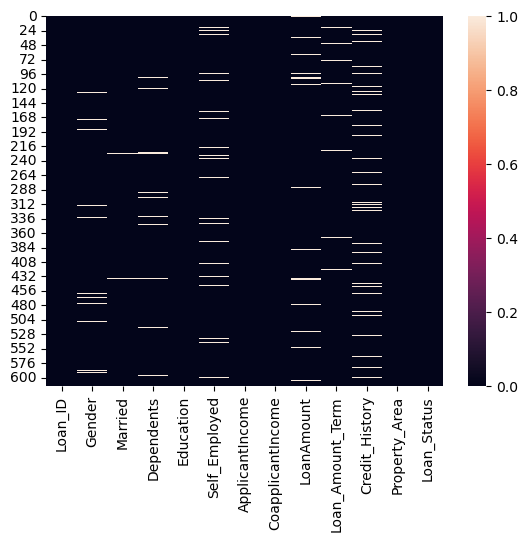

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### WANT TO SEE THE PERCENTAGE OF MISSING VALUES IN EVERY COLUMNS

In [8]:
df.isnull().sum()*100/len (df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
df['Loan_ID'].nunique()

614

Observing that the 'Loan_Id' column contains only unique values, and considering that this column is not pertinent to predicting the target variable, I can confidently opt to drop it

In [10]:
df.drop('Loan_ID',axis=1,inplace=True)

In [11]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [12]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [13]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [14]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [17]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [18]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [20]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df['LoanAmount'].nunique()

203

In [22]:
df['LoanAmount'].mean()

146.41216216216216

In [23]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [24]:
df['LoanAmount'].nunique()

204

In [25]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [26]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

#### AGAIN CHECKING THE NULL VALUES

In [27]:
df.isnull().sum()

Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [29]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### OBSERVATION:
I have successfully filled in all null values with appropriate replacements

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [31]:
df['Dependents']=df['Dependents'].replace(to_replace='3+',value='4')

In [32]:
df['Dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [33]:
df['Dependents']=df['Dependents'].astype (int)

In [34]:
df['Dependents'].dtype

dtype('int32')

In [35]:
for i in df.columns:
    print (df[i].value_counts())
    print ('\n')

Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4


Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

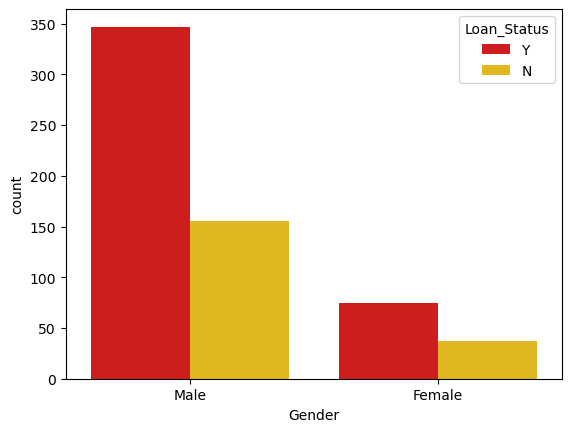

In [36]:
print (df['Gender'].value_counts())
sns.countplot(df,x='Gender',hue='Loan_Status',palette='hot')

#### OBSERVATION:
1. The count of males significantly exceeds that of females
2. Male customers are availing loans more frequently than female customers


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

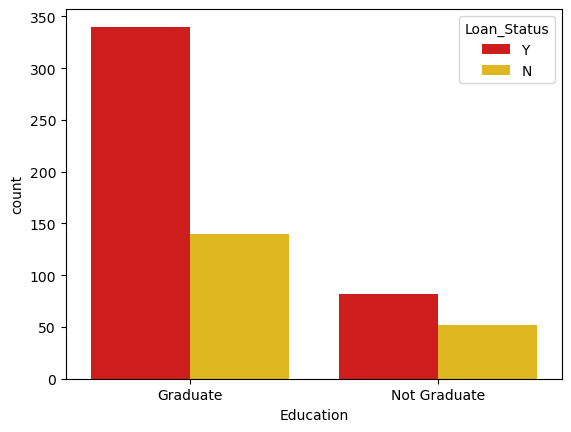

In [37]:
print (df['Education'].value_counts())
sns.countplot(df,x='Education',hue='Loan_Status',palette='hot')

#### OBSERVATION:
1. The number of graduate customers exceeds the count of non-graduate customers
2. Graduate customers are availing loans more frequently than Non Graduate customers

No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

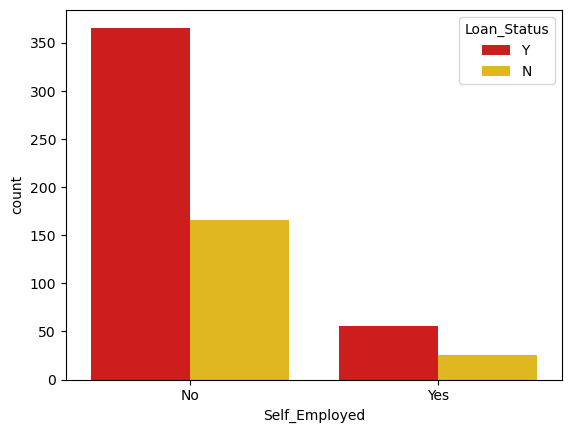

In [38]:
print (df['Self_Employed'].value_counts())
sns.countplot(df,x='Self_Employed',hue='Loan_Status',palette='hot')

#### OBSERVATION:
1. The number of no Self_Employed customers exceeds the count of Self_Employed customers
2. Non Self_Employed customers are availing loans more frequently than Self_Employed customers

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<Axes: xlabel='Property_Area', ylabel='count'>

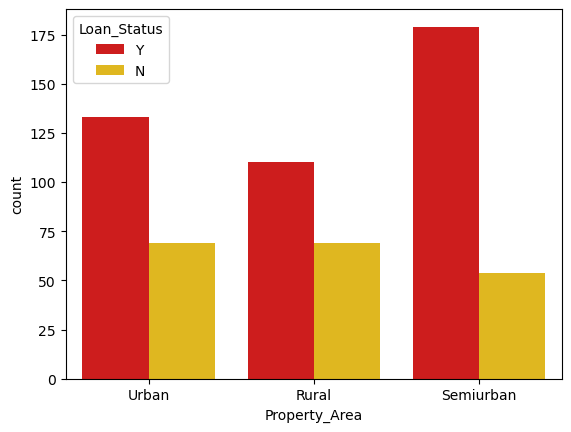

In [39]:
print (df['Property_Area'].value_counts())
sns.countplot(df,x='Property_Area',hue='Loan_Status',palette='hot')

#### OBSERVATION:
1.Semiurban customers have taken out the highest number of loans compared to rural and urban property customers

In [40]:
df.nunique().to_frame ('No of Unique values')

,No of Unique values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11
Credit_History,3


#### ENCODING PROCESS

In [41]:
df['Gender']=df['Gender'].map({'Male':1,'Female':2})

In [42]:
df['Married']=df['Married'].map({'Yes':1,'No':0})

In [43]:
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})

In [44]:
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})

In [45]:
df['Property_Area']=df['Property_Area'].map({'Urban':1,'Rural':2,'Semiurban':3})

In [46]:
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

#### CHECKINH THE DATASET

In [47]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


#### CHECKING THE INFO AGAIN

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 55.3 KB


####  OBSERVATION:
I have successfully converted all categorical columns into numerical representations.

#### CORRELATION CHECK

<Axes: >

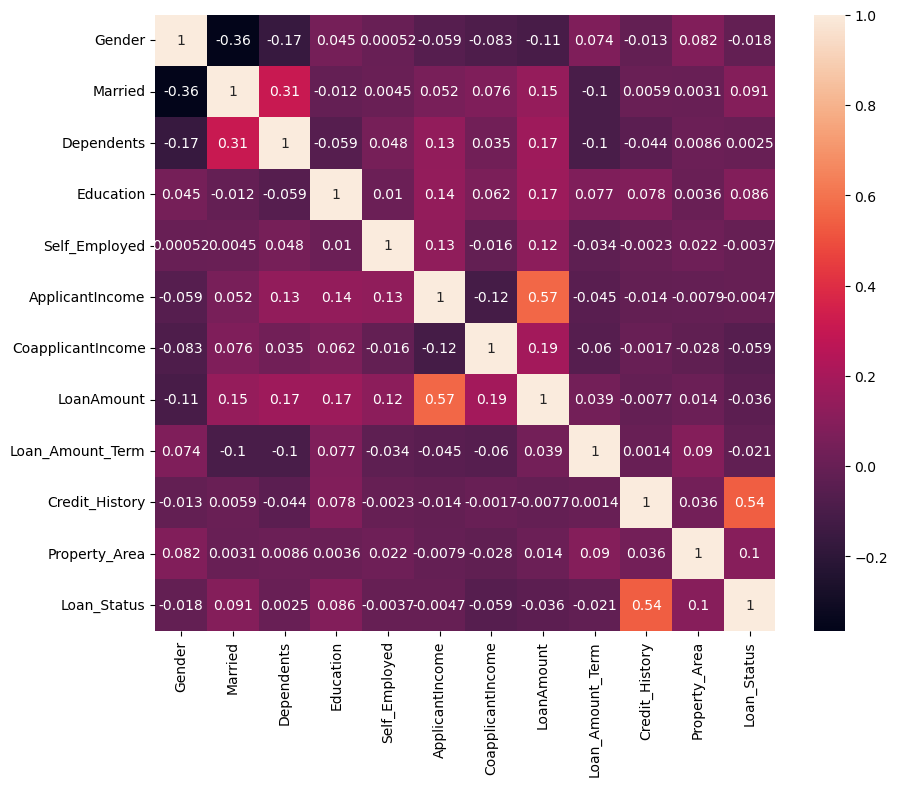

In [49]:
df_cor=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_cor,annot=True)

#### OBSERVATION:
1. Target variable has positive correlation with only Credit_History column
2. All remaining columns exhibit either neutral or negative correlations


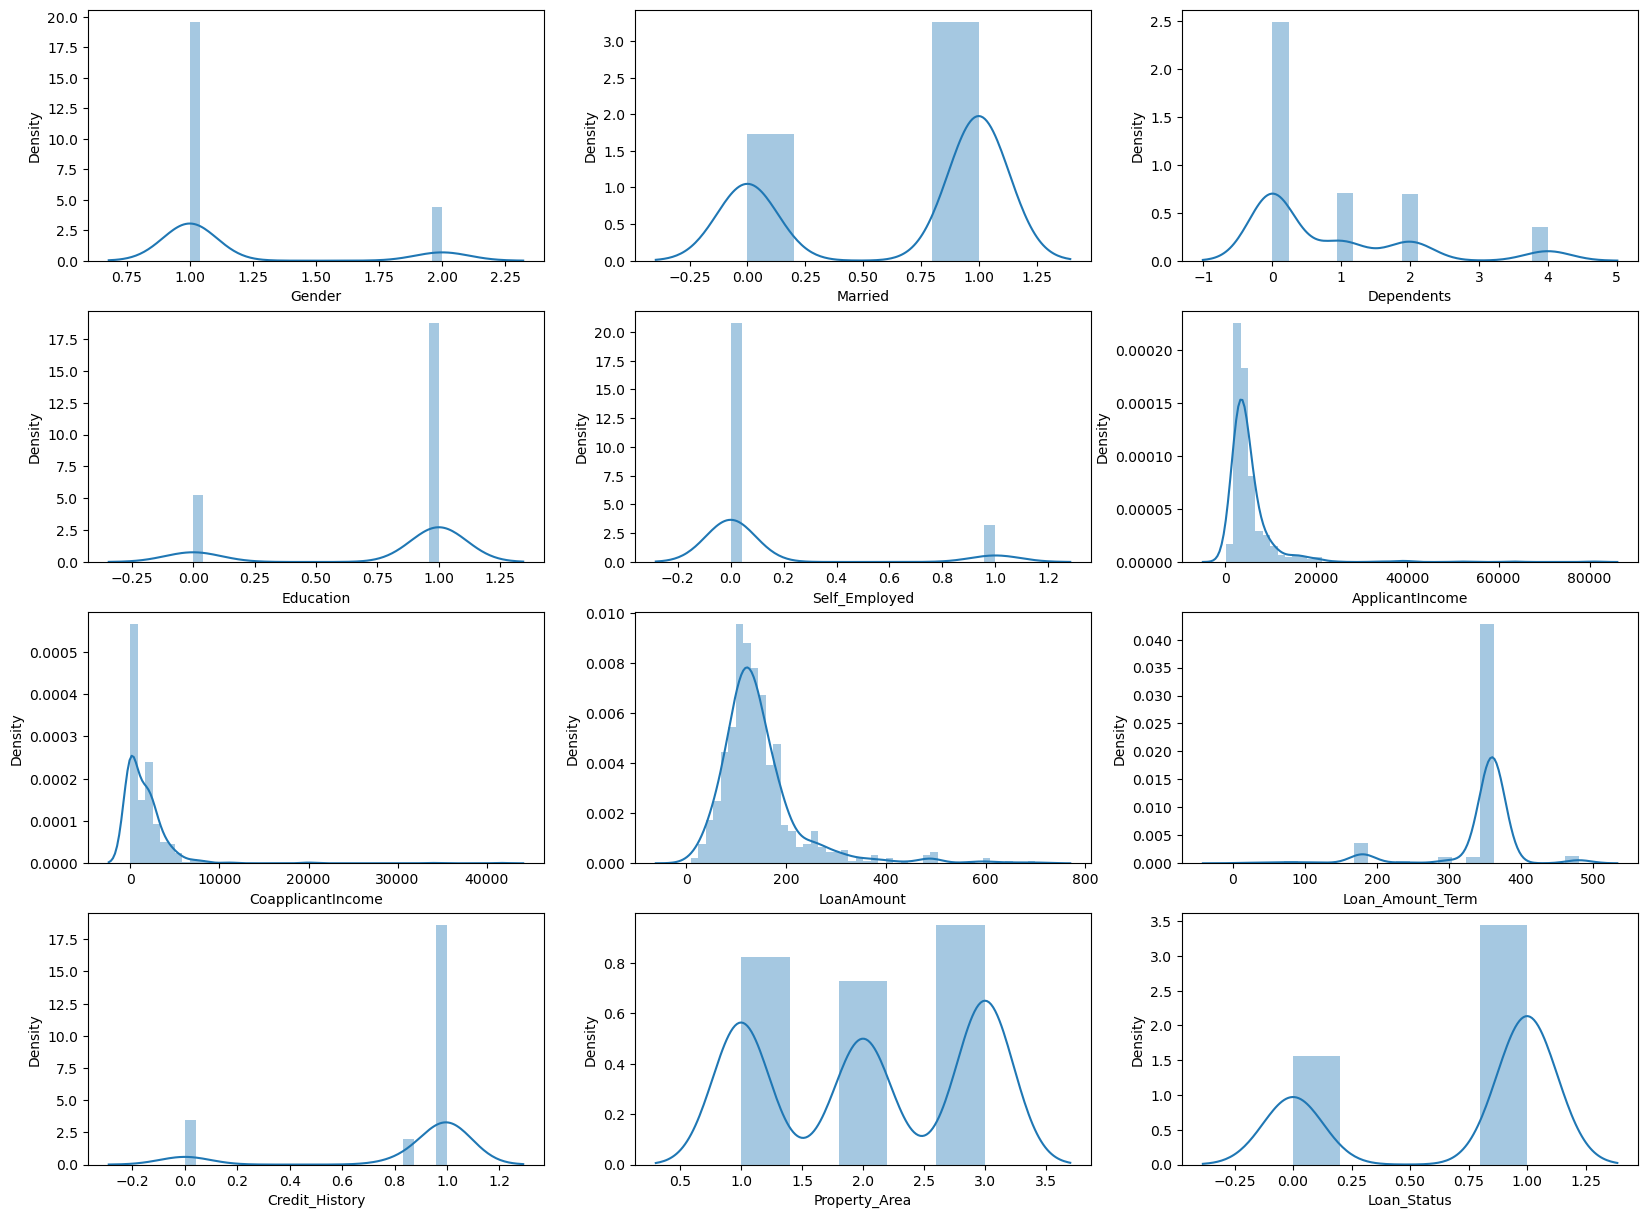

In [50]:
plt.figure(figsize=(20,15))
p=1
for i in df.columns:
    if p<=13:
        plt.subplot(4,3,p)
        sns.distplot(df[i])
        plt.xlabel(i)
    p+=1
plt.show()

#### OBSERVATION:
1. Some columns display skewed data distributions, with both left and right skewness observed in their presentations.

#### CHECKING OUTLIERS USING BOX PLOT

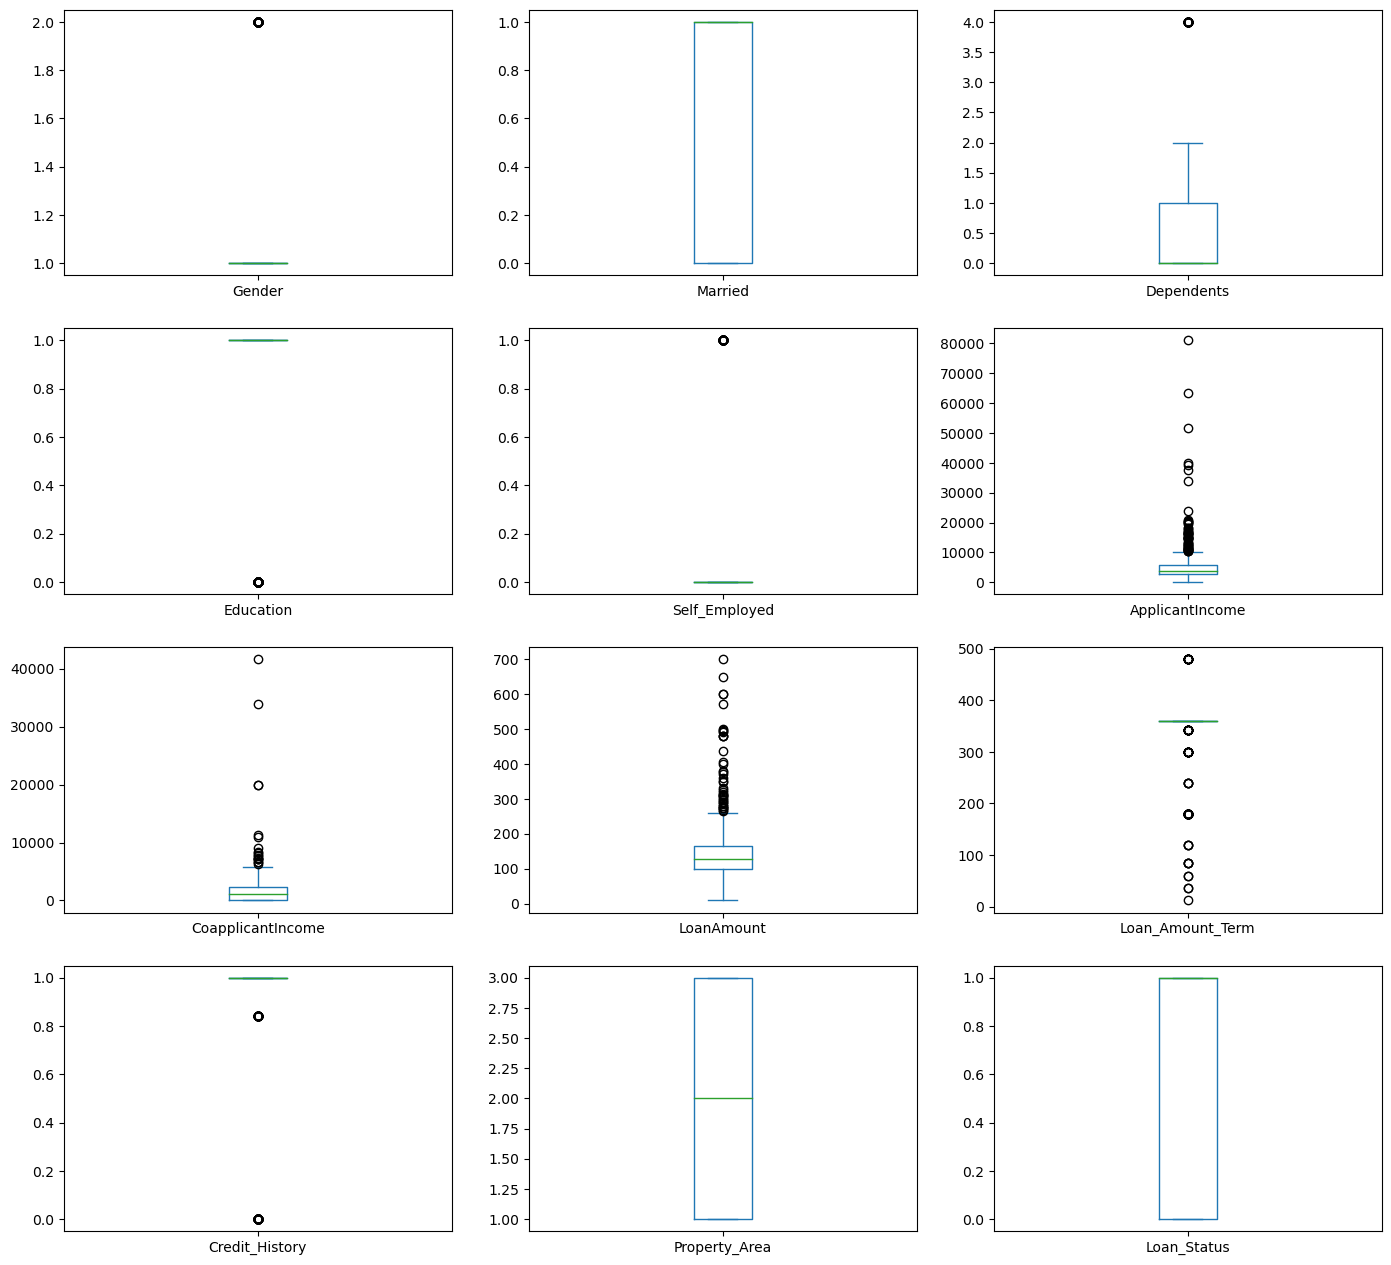

In [51]:
df.plot(kind='box',subplots=True, layout=(5,3),figsize=(17,20))
plt.show()

This box plot suggests the possible presence of outliers in the dataset. To confirm, I will need to examine the descriptive statistics of the dataset.

In [52]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.182410,0.653094,0.827362,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,2.050489,0.687296
std,0.386497,0.476373,1.212833,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.840875,0.463973
min,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000,1.000000
max,2.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,1.000000


#### OBSERVATION:
1. No Null data present now.
2. Both ApplicantIncome and CoapplicantIncome exhibit a mean greater than the median (50th percentile), indicating the presence of right skewness in this dataset.
3. ApplicantIncome, CoapplicantIncome, and LoanAmount display a notable distance between the 75th percentile and the maximum data point, suggesting a wider spread in the data and confirming the presence of outliers.

In [53]:
import scipy
from scipy.stats import zscore

In [54]:
z=np.abs (zscore(df))
thresold=3
print (np.where(z>3))


(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [55]:
z.iloc[9,6]

3.196712546212882

In [56]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(577, 12)

In [57]:
df.shape

(614, 12)

In [58]:
(614-577)/614*100

6.026058631921824

#### OBSERVATION
If I were to drop the outlier values, I would lose 6.2% of the data, which is a significant amount. Therefore, I have decided to remove the outliers.

In [59]:
df=df_new
df.shape

(577, 12)

#### CHCKING SKEWNESS

In [60]:
df.skew()

Gender               1.622920
Married             -0.630211
Dependents           1.500252
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.091645
Loan_Status         -0.822635
dtype: float64

In [61]:
df['Gender']=np.sqrt(df['Gender'])
print (df['Gender'].skew())

1.6229199944893946


In [62]:
df['Dependents']=np.sqrt(df['Dependents'])
print(df['Dependents'].skew())

0.7419412580747101


In [63]:
df['Education']=np.cbrt(df['Education'])
print(df['Education'].skew())

-1.3065883459576066


In [64]:
df['Self_Employed']=np.sqrt(df['Self_Employed'])
print(df['Self_Employed'].skew())

2.2528479205324365


In [65]:
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])
print(df['ApplicantIncome'].skew())

1.2086126392712866


In [66]:
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])
print(df['ApplicantIncome'].skew())

0.6383104943692551


In [67]:
df['CoapplicantIncome']=np.sqrt(df['CoapplicantIncome'])
print(df['CoapplicantIncome'].skew())

0.2075911285132824


In [68]:
df['LoanAmount']=np.sqrt(df['LoanAmount'])
print(df['LoanAmount'].skew())

0.32037194343605385


In [69]:
df.skew()

Gender               1.622920
Married             -0.630211
Dependents           0.741941
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome      0.638310
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.091645
Loan_Status         -0.822635
dtype: float64

#### SPLIT THE DATASET

In [70]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
print (x.shape)
print (y.shape)

(577, 11)
(577,)


#### SCALING THE DATASET

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.477137,-1.362511,-0.775406,0.541961,-0.380580,0.644091,-1.048379,0.287444,0.239408,0.456461,-1.252081
1,-0.477137,0.733939,0.643363,0.541961,-0.380580,0.181506,0.444242,-0.047549,0.239408,0.456461,-0.057948
2,-0.477137,0.733939,-0.775406,0.541961,2.627567,-0.558001,-1.048379,-1.406327,0.239408,0.456461,-1.252081
3,-0.477137,0.733939,-0.775406,-1.845150,-0.380580,-0.801022,0.818090,-0.200590,0.239408,0.456461,-1.252081
4,-0.477137,-1.362511,-0.775406,0.541961,-0.380580,0.694078,-1.048379,0.191277,0.239408,0.456461,-1.252081
...,...,...,...,...,...,...,...,...,...,...,...
572,2.095835,-1.362511,-0.775406,0.541961,-0.380580,-0.613850,-1.048379,-1.277630,0.239408,0.456461,-0.057948
573,-0.477137,0.733939,2.062132,0.541961,-0.380580,-0.017885,-1.048379,-2.172895,-3.237229,0.456461,-0.057948
574,-0.477137,0.733939,0.643363,0.541961,-0.380580,1.299876,-0.452917,1.908726,0.239408,0.456461,-1.252081
575,-0.477137,0.733939,1.231037,0.541961,-0.380580,1.168493,-1.048379,0.958258,0.239408,0.456461,-1.252081


#### CHECKING VIF

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
vif=pd.DataFrame()
vif['VIF Features']=[variance_inflation_factor (x.values,i) for i in range (len (x.columns))]
vif['Features']=x.columns
vif

,VIF Features,Features
0,1.226095,Gender
1,1.394395,Married
2,1.184412,Dependents
3,1.066377,Education
4,1.059940,Self_Employed
5,1.820342,ApplicantIncome
6,1.592492,CoapplicantIncome
7,1.676999,LoanAmount
8,1.068200,Loan_Amount_Term
9,1.012794,Credit_History


####  OBSERVATION:
No multicollinearity is presence in this dataset

#### OVERSAMPLING

In [75]:
import imblearn
from imblearn.over_sampling import SMOTE

In [76]:
sm=SMOTE()
x_new,y_new=sm.fit_resample(x,y)


In [77]:
print (y_new.value_counts())
print (y.value_counts())

1    398
0    398
Name: Loan_Status, dtype: int64
1    398
0    179
Name: Loan_Status, dtype: int64


In [78]:
x,y=x_new,y_new

In [79]:
print(y.value_counts())

1    398
0    398
Name: Loan_Status, dtype: int64


#### DATA MODELING

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [81]:
maxAcc=0
maxRE=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lg=LogisticRegression()
    lg.fit (x_train,y_train)
    pred_lg=lg.predict(x_test)
    acc=accuracy_score(pred_lg,y_test)
    if acc>maxAcc:
        maxAcc=acc
        maxRE=i

print ("Best accuracy score:",maxAcc,"Best random Estate:",maxRE)

Best accuracy score: 0.7656903765690377 Best random Estate: 24


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

In [83]:
model_df={}
def classification_Model(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=177)
    model.fit (x_train,y_train)
    model_pred=model.predict (x_test)
    print ('Best Model traning Score:',model.score (x_train,y_train))
    print ('Best Accuracy Score:',accuracy_score(model_pred,y_test))
    print ('\n')
    
    score=cross_val_score(model,x,y,cv=7)
    print ('Best CV Score:',np.mean (score))
    model_df[model]=round(np.mean(score)*100,2)

In [95]:
model_df

{LogisticRegression(): 70.6,
 RandomForestClassifier(): 84.07,
 ExtraTreesClassifier(): 85.82,
 GaussianNB(): 69.72,
 GradientBoostingClassifier(): 82.81,
 AdaBoostClassifier(): 77.4,
 BaggingClassifier(): 81.29,
 DecisionTreeClassifier(): 78.15,
 LogisticRegression(): 70.6}

In [94]:
model=LogisticRegression()
classification_Model(model)

Best Model traning Score: 0.7091194968553459
Best Accuracy Score: 0.75625


Best CV Score: 0.7059684609754475


In [86]:
model=RandomForestClassifier()
classification_Model(model)

Best Model traning Score: 1.0
Best Accuracy Score: 0.85625


Best CV Score: 0.840652516246368


In [87]:
model=ExtraTreesClassifier()
classification_Model(model)

Best Model traning Score: 1.0
Best Accuracy Score: 0.8875


Best CV Score: 0.8582185552376516


In [88]:
model=GaussianNB()
classification_Model(model)

Best Model traning Score: 0.6918238993710691
Best Accuracy Score: 0.725


Best CV Score: 0.6972187104930468


In [89]:
model=GradientBoostingClassifier()
classification_Model(model)

Best Model traning Score: 0.9182389937106918
Best Accuracy Score: 0.85


Best CV Score: 0.8280657395701644


In [90]:
model=AdaBoostClassifier()
classification_Model(model)

Best Model traning Score: 0.8537735849056604
Best Accuracy Score: 0.825


Best CV Score: 0.7739592343691086


In [91]:
model=BaggingClassifier()
classification_Model(model)

Best Model traning Score: 0.9858490566037735
Best Accuracy Score: 0.8


Best CV Score: 0.8128839798611575


In [92]:
model=DecisionTreeClassifier()
classification_Model(model)

Best Model traning Score: 1.0
Best Accuracy Score: 0.775


Best CV Score: 0.7815113003748309


#### Hyper Parameter Tuning 

In [96]:
from sklearn.model_selection import GridSearchCV

In [101]:
prama={'n_estimators':[10,30,50,70,90,100],
      'criterion':['gini','entropy','log_loss'],
      'max_features':['sqrt','log2'],
      'warm_start':[True, False]}

In [102]:
gscv=GridSearchCV(ExtraTreesClassifier(),prama,cv=7)
gscv.fit(x_train,y_train)


GridSearchCV(cv=7, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 30, 50, 70, 90, 100],
                         'warm_start': [True, False]})

In [103]:
gscv.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'n_estimators': 100,
 'warm_start': True}

#### FINAL MODEL

In [104]:
finalModel=ExtraTreesClassifier(n_estimators=100,criterion='entropy',max_features='log2',warm_start=True)
finalModel.fit (x_train,y_train)
finalModel_pred=finalModel.predict(x_test)
print ('Best Model traning Score:',finalModel.score(x_train,y_train))
print('Best Accuracy Score:', accuracy_score(finalModel_pred,y_test))
print ('\n')

score=cross_val_score(finalModel,x,y,cv=7)
print ('Best CV Score:',np.mean(score))

Best Model traning Score: 1.0
Best Accuracy Score: 0.8493723849372385


Best CV Score: 0.8594827777408122


#### AUC ROC CURVE DISPLAY

In [106]:
from sklearn import metrics

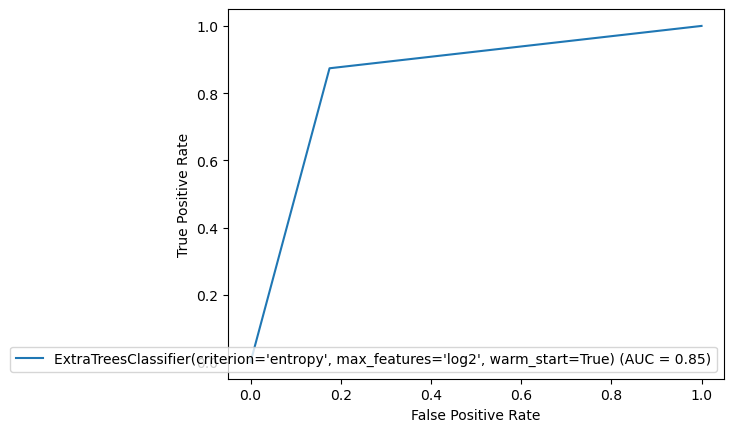

In [107]:
fpr,tpr,thresold=metrics.roc_curve(finalModel_pred,y_test)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=finalModel)
display.plot()

#### SAVE THE MODEL

In [108]:
import joblib

In [109]:
joblib.dump(finalModel,'Extratree_Lone.obj')

['Extratree_Lone.obj']

In [111]:
Lone_predict_Model=joblib.load('Extratree_Lone.obj')
Lone_predict_Model.predict (x_test)

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
      dtype=int64)

#### TEST THE MODEL

In [112]:
def modeltest(p):
    p=p.reshape (1,-1)
    pred=Lone_predict_Model.predict(p)
    print (pred)
    if pred==1:
        print ('Lone Approved')
    else:
        print ('Lone Not Approved')

In [113]:
p=np.array([-0.512477,-1.745511,-0.665406,0.641961,-0.280580,0.744091,-1.048469,0.274444,0.237408,0.556461,-1.352081])

In [114]:
modeltest(p)

[1]
Lone Approved
